# Import libraries and data
## Preparing data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics

from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
path = r'C:\Users\Michael\Desktop\Career Foundry\03 Machine Learning\01 Basics of Machine Learning for Analysts\00 Data Sets'

In [4]:
df_unscaled =  pd.read_csv(os.path.join(path, 'DataSet_unscaled_trimmed.csv'), index_col = False)
df_unscaled = df_unscaled.drop(['DATE', 'MONTH'], axis=1)
df_unscaled

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,6.5,0.8,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,6.1,3.3,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,8.5,5.1,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,6.3,3.8,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,3.0,-0.7,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,15.9,11.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,16.7,14.3,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,16.7,13.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,15.4,11.6,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [5]:
df_scaled =  pd.read_csv(os.path.join(path, 'DataSet_scaled_trimmed.csv'), index_col = False)
df_scaled = df_scaled.drop(['DATE', 'MONTH'], axis=1)
df_scaled

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,-0.462450,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,-0.186545,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,-0.555784,-0.385810,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,-1.003946,-1.075573,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,0.720943,0.747959,0.779123,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,0.187388,0.856604,1.223637,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,0.349774,0.856604,1.039701,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,0.280180,0.680055,0.809780,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [6]:
df_pleasant =  pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)
df_pleasant =  df_pleasant.drop(['DATE'], axis=1)
df_pleasant

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Split Data into Test and Train

In [7]:
X = df_unscaled
y = df_pleasant

print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [8]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


# Scale and Compare

In [9]:
scaler = StandardScaler()
#Fit the train data
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[-1.41107749 -0.03095027 -0.61660315 ...  1.45475014  1.57581674
   1.16512065]
 [ 1.08186228 -0.58789342  0.55778807 ... -0.0139084  -0.0077553
  -0.00981651]
 [ 0.66637232 -0.866365    0.73846364 ... -2.92125284 -3.22950531
  -2.18774879]
 ...
 [ 1.08186228 -0.03095027  1.64184151 ... -0.07385364  0.48369809
  -0.61161358]
 [ 0.66637232 -0.03095027  0.64812586 ...  0.55557144  0.42909216
   0.64929458]
 [-1.41107749 -1.14483657 -1.33930544 ... -0.0139084  -0.0077553
  -0.00981651]]


In [10]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

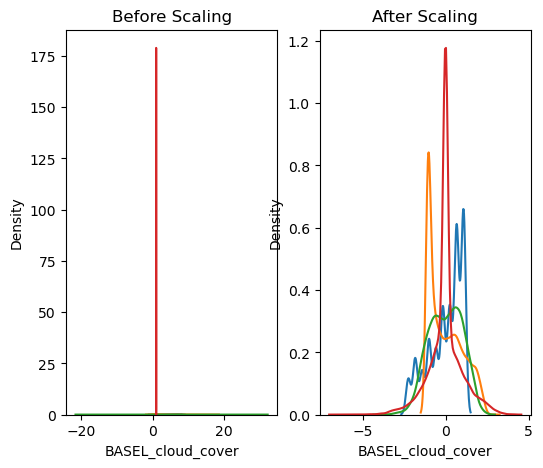

In [11]:
# Show scaling differences
# Four of the variables have been chosen from one location in order to see a sample of the difference made by scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['BASEL_cloud_cover'], ax=ax1)
sns.kdeplot(X_train['BASEL_sunshine'], ax=ax1)
sns.kdeplot(X_train['BASEL_temp_mean'], ax=ax1)
sns.kdeplot(X_train['BASEL_pressure'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_df['BASEL_cloud_cover'], ax=ax2)
sns.kdeplot(X_train_df['BASEL_sunshine'], ax=ax2)
sns.kdeplot(X_train_df['BASEL_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['BASEL_pressure'], ax=ax2)

plt.show()

# SCALE DATA
# Create and run the ANN

In [12]:
# Reset the data using the original scaled dataframe

X_sc = df_scaled
y = df_pleasant

print(X.shape)
print(y.shape)

#Split data into training and testing sets.
X_train_sc, X_test_sc, y_train, y_test = train_test_split(X_sc, y, random_state=42)

print(X_train_sc.shape)
print(X_test_sc.shape)
print(y_train.shape)
print(y_test.shape)

(22950, 147)
(22950, 15)
(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


## 1st Run: hidden_layer_sizes=(5, 5)

In [13]:
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train_sc, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [14]:
y_pred = mlp.predict(X_train_sc)
print(np.round(accuracy_score(y_pred, y_train),3))
y_pred_test = mlp.predict(X_test_sc)
print(np.round(accuracy_score(y_pred_test, y_test),3))

0.488
0.497


## 2nd Run: hidden_layer_sizes=(10, 5)

In [15]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train_sc, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500)

In [16]:
y_pred = mlp.predict(X_train_sc)
print(np.round(accuracy_score(y_pred, y_train),3))
y_pred_test = mlp.predict(X_test_sc)
print(np.round(accuracy_score(y_pred_test, y_test),3))

0.524
0.524


## 3rd Run: hidden_layer_sizes=(20, 10, 10)

In [17]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train_sc, y_train)

MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000)

In [18]:
y_pred = mlp.predict(X_train_sc)
print(np.round(accuracy_score(y_pred, y_train),3))
y_pred_test = mlp.predict(X_test_sc)
print(np.round(accuracy_score(y_pred_test, y_test),3))

0.673
0.644


# UNSCALED DATA
# Create and run the ANN

## 1st Run: hidden_layer_sizes=(5, 5)

In [19]:
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [20]:
y_pred = mlp.predict(X_train)
print(np.round(accuracy_score(y_pred, y_train),3))
y_pred_test = mlp.predict(X_test)
print(np.round(accuracy_score(y_pred_test, y_test),3))

0.466
0.474


## 2nd Run: hidden_layer_sizes=(10, 5)

In [21]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500)

In [22]:
y_pred = mlp.predict(X_train)
print(np.round(accuracy_score(y_pred, y_train),3))
y_pred_test = mlp.predict(X_test)
print(np.round(accuracy_score(y_pred_test, y_test),3))

0.498
0.5


## 3rd Run: hidden_layer_sizes=(20, 10, 10)

In [23]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000)

In [24]:
y_pred = mlp.predict(X_train)
print(np.round(accuracy_score(y_pred, y_train),3))
y_pred_test = mlp.predict(X_test)
print(np.round(accuracy_score(y_pred_test, y_test),3))

0.558
0.555


# SCALE DATA
## Further tests with different settings for layers and iterations

In [25]:
mlp = MLPClassifier(hidden_layer_sizes=(25, 20, 15), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train_sc, y_train)

y_pred = mlp.predict(X_train_sc)
print(np.round(accuracy_score(y_pred, y_train),3))
y_pred_test = mlp.predict(X_test_sc)
print(np.round(accuracy_score(y_pred_test, y_test),3))

0.717
0.667


In [26]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train_sc, y_train)

y_pred = mlp.predict(X_train_sc)
print(np.round(accuracy_score(y_pred, y_train),3))
y_pred_test = mlp.predict(X_test_sc)
print(np.round(accuracy_score(y_pred_test, y_test),3))

0.696
0.66


In [27]:
mlp = MLPClassifier(hidden_layer_sizes=(30, 20, 10), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train_sc, y_train)

y_pred = mlp.predict(X_train_sc)
print(np.round(accuracy_score(y_pred, y_train),3))
y_pred_test = mlp.predict(X_test_sc)
print(np.round(accuracy_score(y_pred_test, y_test),3))

0.699
0.647


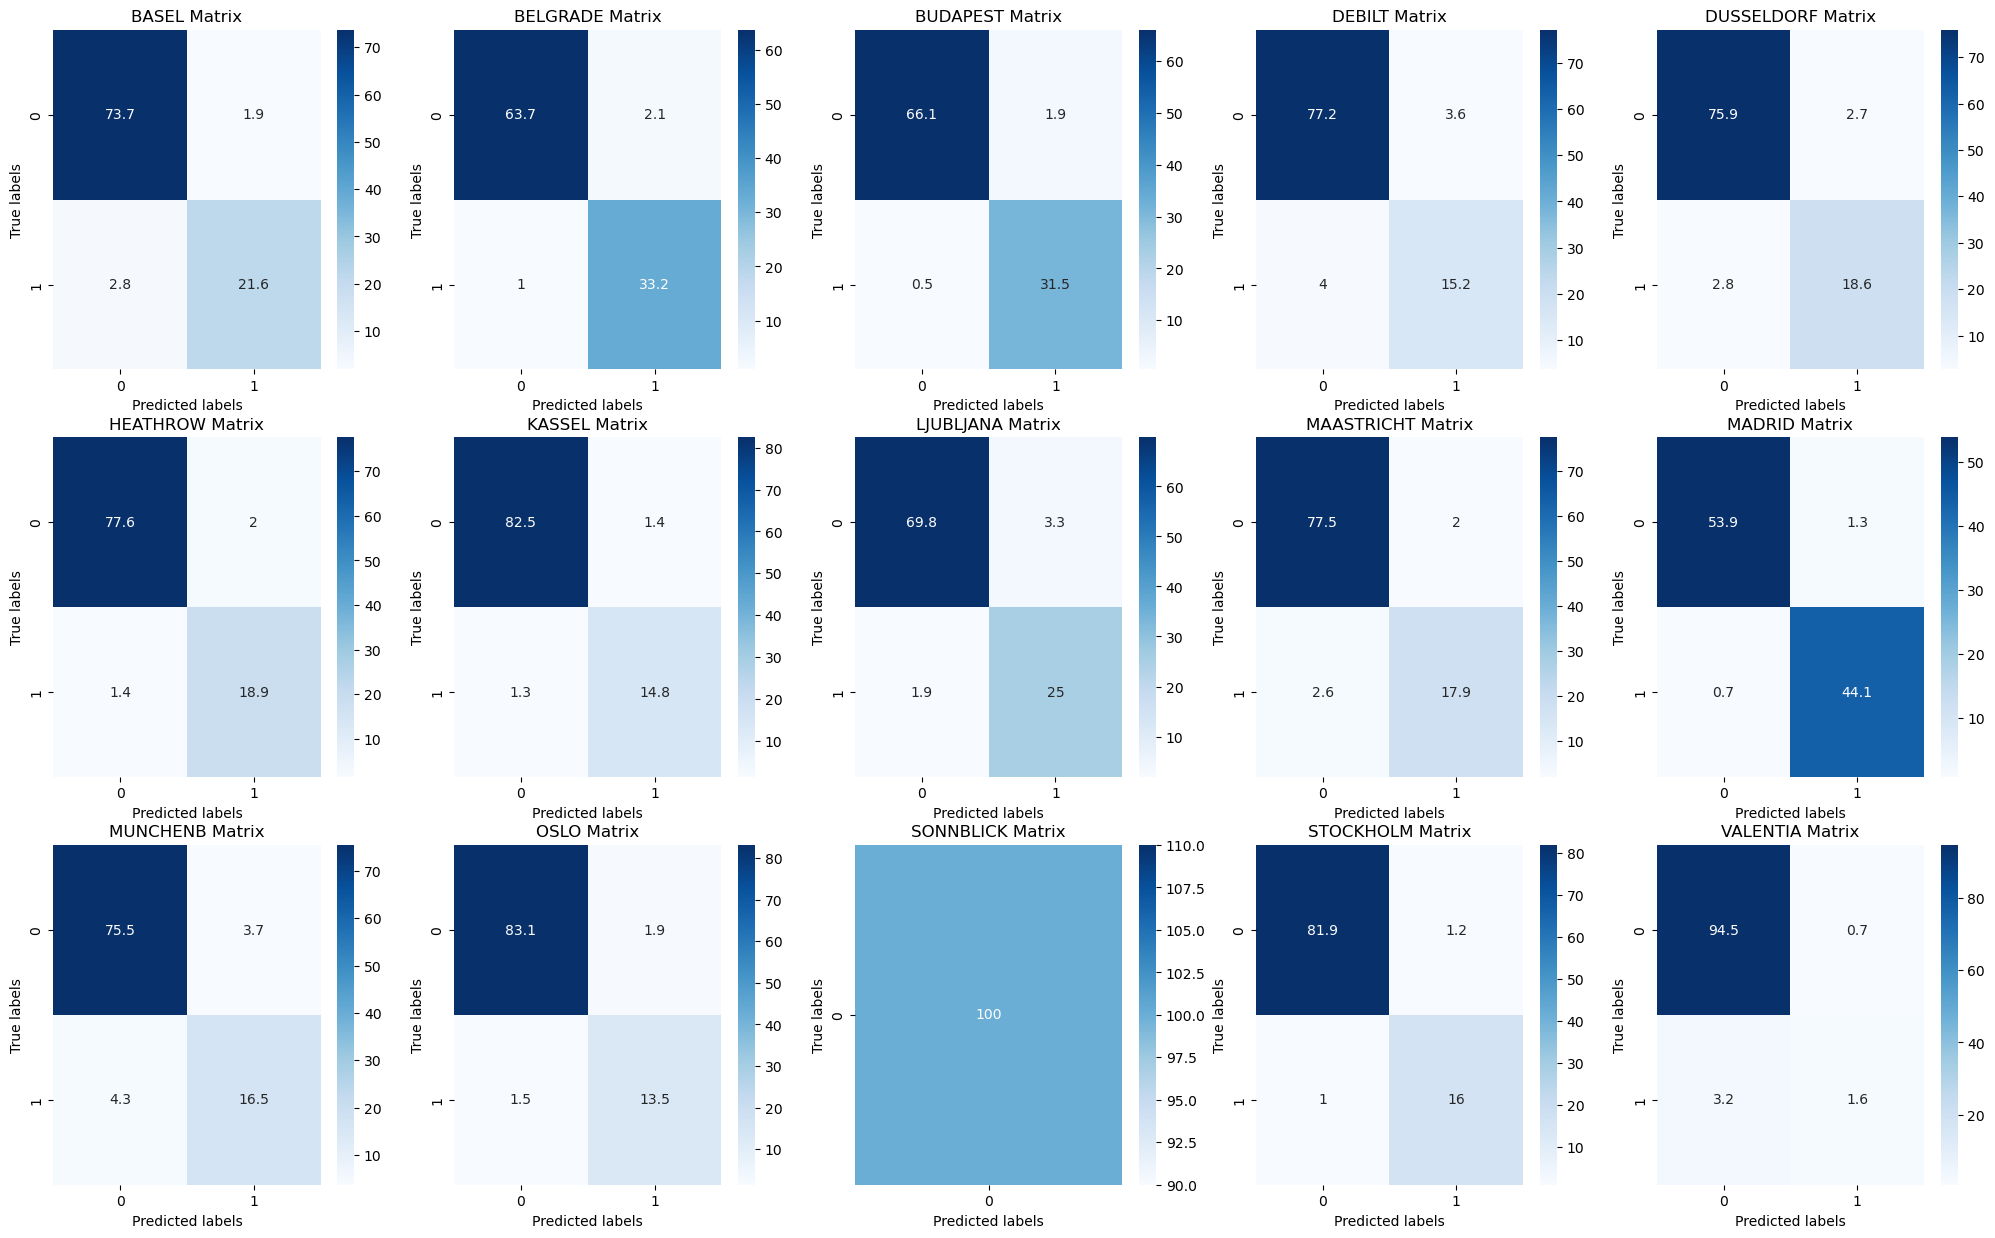

In [28]:
locations = list({x.split("_")[0] for x in df_scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(np.round(100*cm/np.sum(cm), decimals=1), annot=True, fmt='g',  ax=ax[i,j], cmap='Blues');
        
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [29]:
mlp = MLPClassifier(hidden_layer_sizes=(25, 20, 15), max_iter=2000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train_sc, y_train)

y_pred = mlp.predict(X_train_sc)
print(np.round(accuracy_score(y_pred, y_train),3))
y_pred_test = mlp.predict(X_test_sc)
print(np.round(accuracy_score(y_pred_test, y_test),3))

0.724
0.669


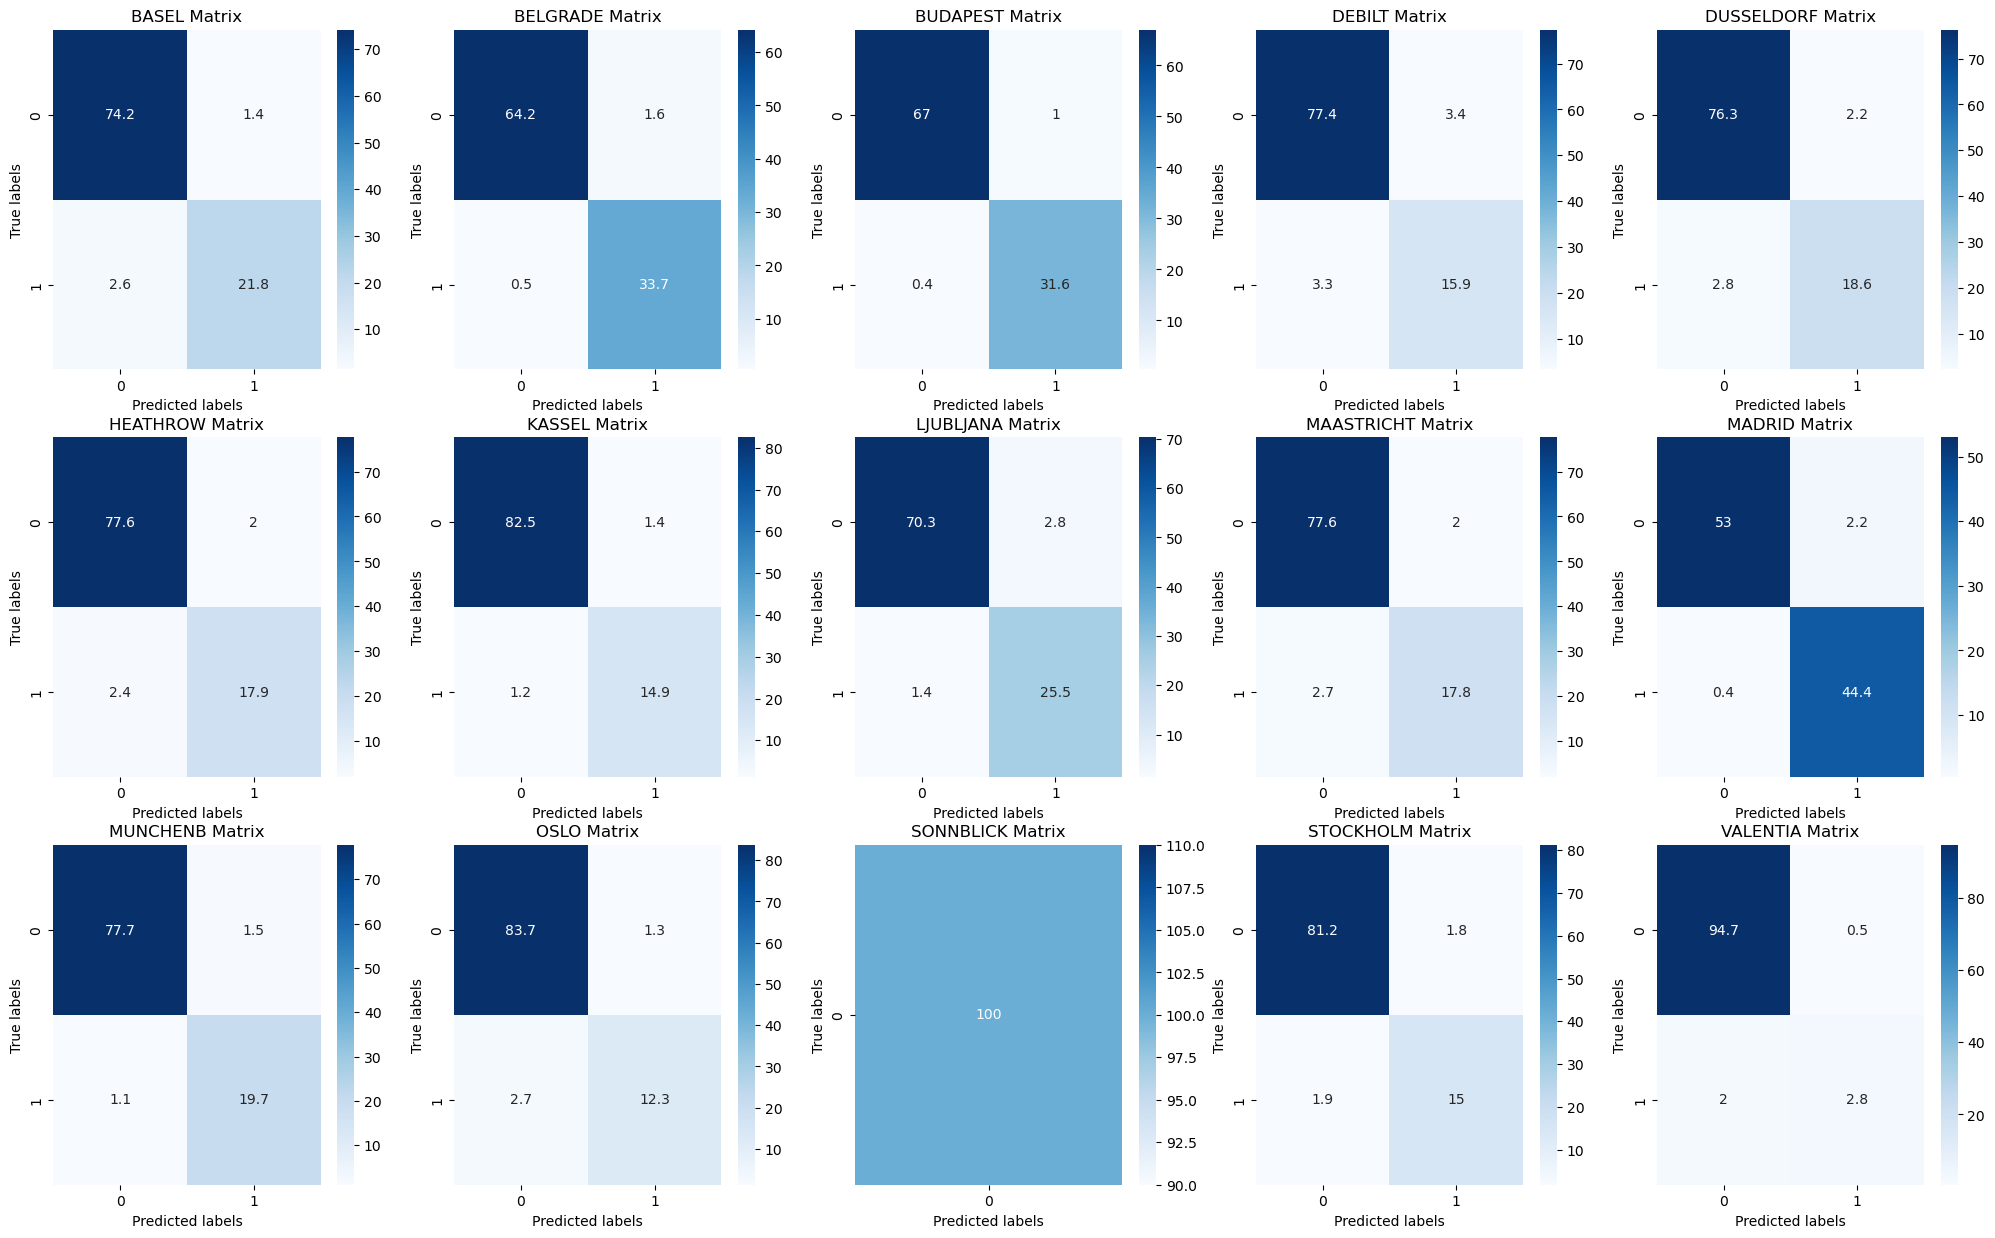

In [30]:
locations = list({x.split("_")[0] for x in df_scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(np.round(100*cm/np.sum(cm), decimals=1), annot=True, fmt='g',  ax=ax[i,j], cmap='Blues');
        
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [31]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=3000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train_sc, y_train)

y_pred = mlp.predict(X_train_sc)
print(np.round(accuracy_score(y_pred, y_train),3))
y_pred_test = mlp.predict(X_test_sc)
print(np.round(accuracy_score(y_pred_test, y_test),3))

0.758
0.615


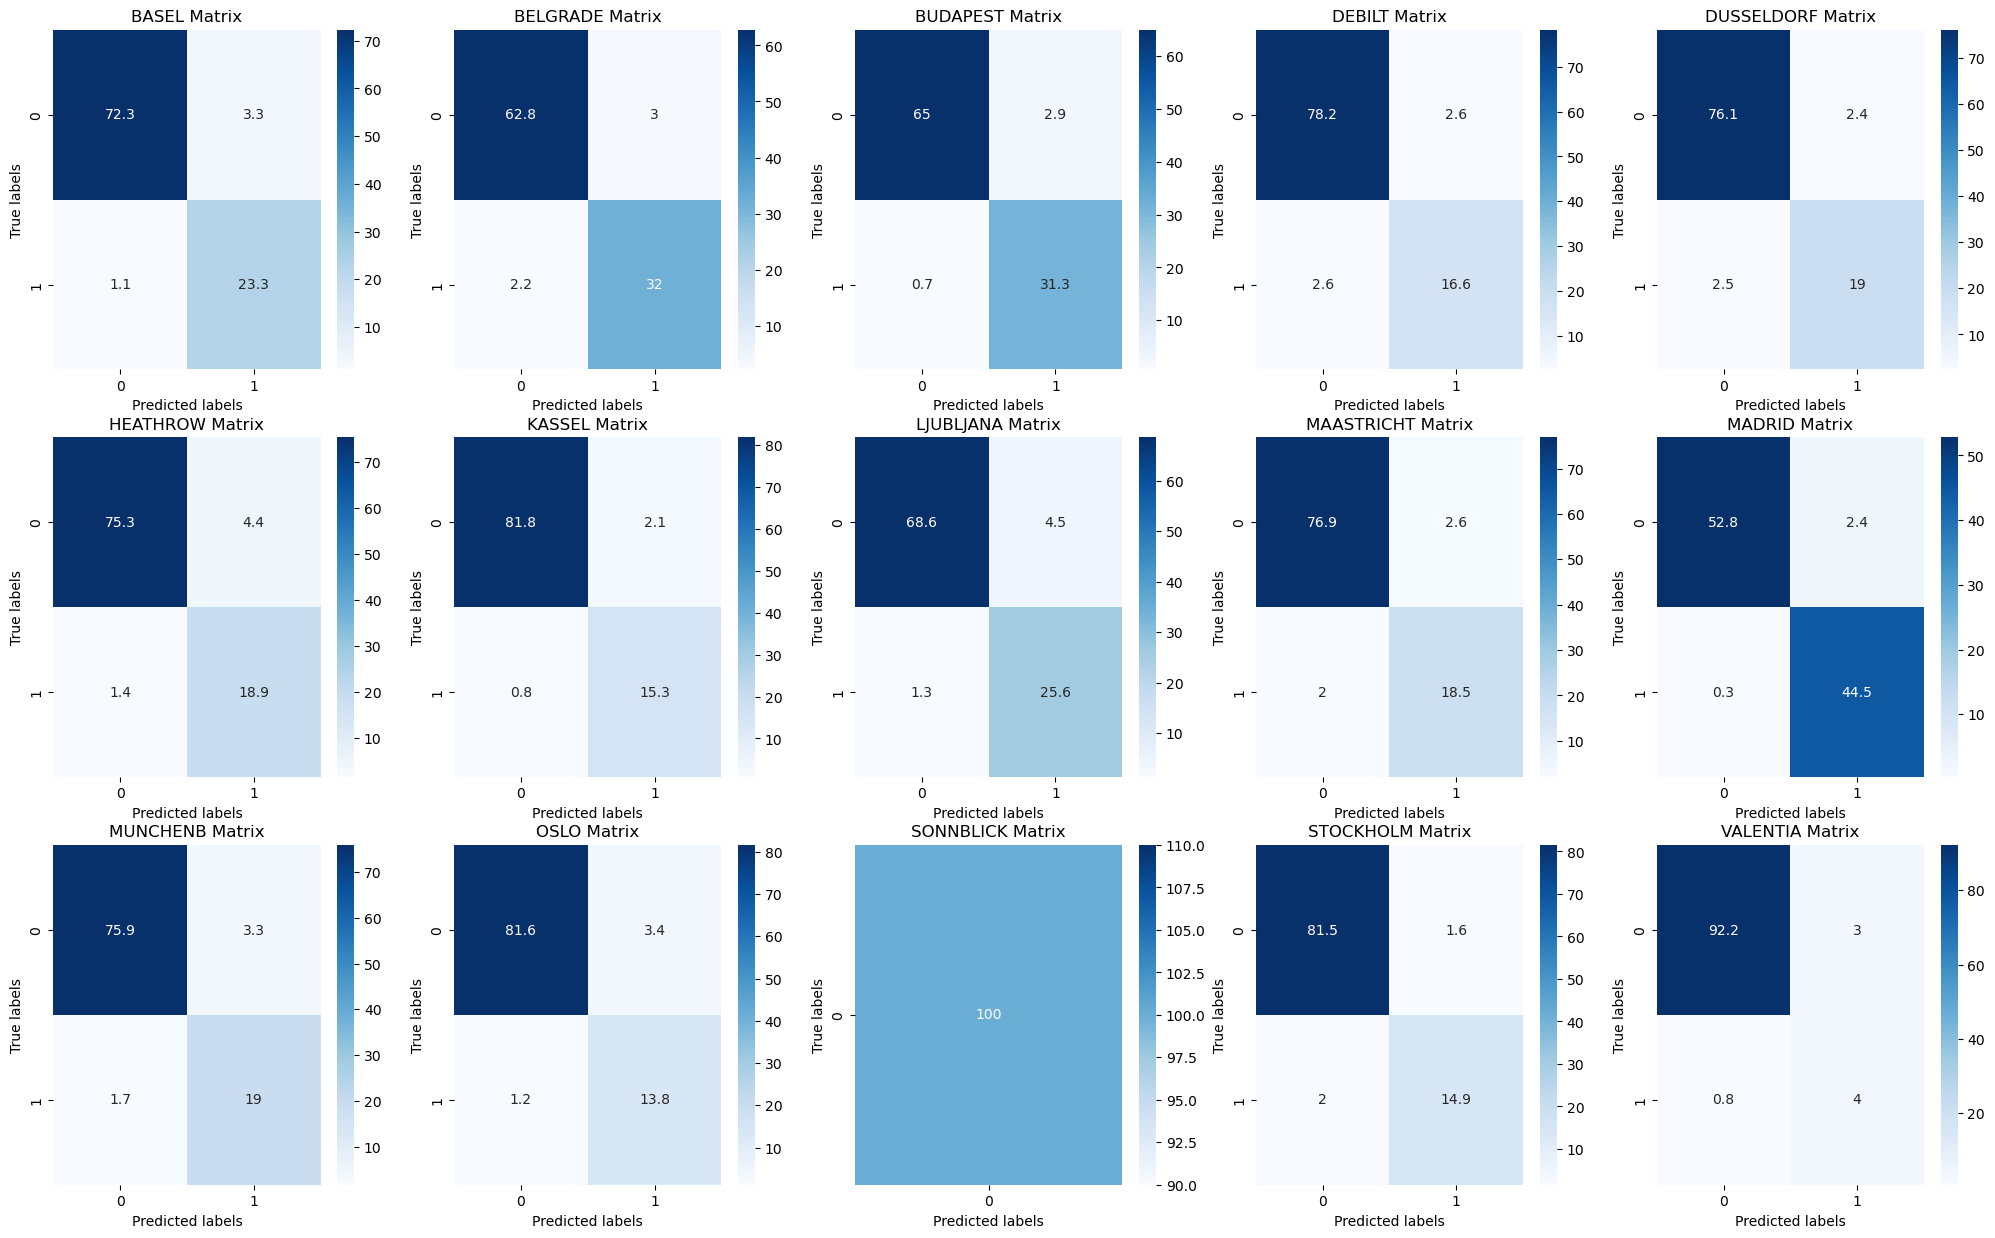

In [32]:
locations = list({x.split("_")[0] for x in df_scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(np.round(100*cm/np.sum(cm), decimals=1), annot=True, fmt='g',  ax=ax[i,j], cmap='Blues');
        
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1